In [16]:
import os
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colorbar import ColorbarBase

In [17]:
# loading data
a = np.loadtxt('Confidence data.csv',skiprows=1, delimiter=',', dtype = str)
pc1 = np.array(a[:,1], dtype = 'float32')
pc2 = np.array(a[:,2], dtype = 'float32')
confidence = np.array(a[:,3], dtype = 'float32')
label = np.array(a[:,4], dtype = 'int')
cutoff_idx = np.where(label==0)[0][0]

norm_confidence = np.zeros(confidence.shape)  #get a normalized confidence value in range of 0 to 1 for colors
norm_confidence[:cutoff_idx] = (confidence[:cutoff_idx]-np.min(confidence[:cutoff_idx]))/(np.max(confidence[:cutoff_idx])-np.min(confidence[:cutoff_idx]))
norm_confidence[cutoff_idx:] = (confidence[cutoff_idx:]-np.min(confidence[cutoff_idx:]))/(np.max(confidence[cutoff_idx:])-np.min(confidence[cutoff_idx:]))
color = ['Blues', 'Greens']

In [18]:
cutoff_idx

81

Text(0, 0.5, 'PC1')

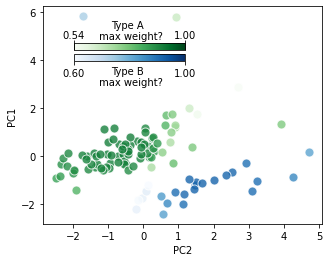

In [4]:
fig, ax = plt.subplots(figsize=(5,4))
for p1, p2, c, l in zip(pc1, pc2, norm_confidence, label):
    ll = None
    if all([c==1, l==1]): ll = 'Type A'
    elif all([c==1, l==0]): ll = 'Type B'
    ax.plot(p1, p2, color = plt.cm.get_cmap(color[l])(c*0.8), marker = '.', alpha = 0.8, 
            markeredgecolor='w', ms=18, label = ll, lw = 0)
    
# Adding colorbar typeA
cbaxes_typeA = ax.inset_axes([0.11, 0.8, 0.4, 0.03])
cbar = ColorbarBase(cbaxes_typeA, cmap=plt.cm.get_cmap(color[1]), orientation='horizontal', ticks=[0, 1])
cbar.ax.xaxis.set_tick_params(labeltop=True, direction='in', length=10)
cbar.ax.xaxis.set_tick_params(labelbottom=False)
cbar.set_ticklabels(['%.2f'%np.min(confidence[:cutoff_idx]), '%.2f'%np.max(confidence[:cutoff_idx])])
cbar.set_label('Type A \n max weight?', labelpad=-30)

# Adding colorbar typeB
cbaxes_typeB = ax.inset_axes([0.11, 0.75, 0.4, 0.03])
cbar = ColorbarBase(cbaxes_typeB, cmap=plt.cm.get_cmap(color[0]), orientation='horizontal', ticks=[0, 1])
cbar.set_ticklabels(['%.2f'%np.min(confidence[cutoff_idx:]), '%.2f'%np.max(confidence[cutoff_idx:])])
cbar.set_label('Type B \n max weight?', labelpad=-12)

ax.set_xlabel('PC2')
ax.set_ylabel('PC1')

Text(0, 0.5, 'PC1')

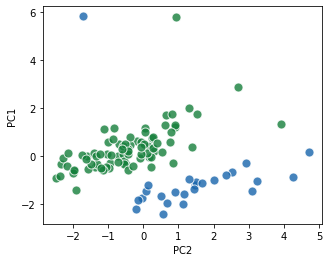

In [15]:
# plot regular k-means clustering
hard_confidence = np.ones(confidence.shape)  #get a normalized confidence value in range of 0 to 1 for colors

fig, ax = plt.subplots(figsize=(5,4))
for p1, p2, c, l in zip(pc1, pc2, hard_confidence, label):
    ll = None
    if all([c==1, l==1]): ll = 'Type A'
    elif all([c==1, l==0]): ll = 'Type B'
    ax.plot(p1, p2, color = plt.cm.get_cmap(color[l])(c*0.8), marker = '.', alpha = 0.8, 
            markeredgecolor='w', ms=18, label = ll, lw = 0)
    


ax.set_xlabel('PC2')
ax.set_ylabel('PC1')

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))
for p1, p2, c, l in zip(pc1, pc2, hard_confidence, label):
    ll = None
    if all([c==1, l==1]): ll = 'Type A'
    elif all([c==1, l==0]): ll = 'Type B'
    ax.plot(p1, p2, color = plt.cm.get_cmap(color[l])(c*0.8), marker = '.', alpha = 0.8, 
            markeredgecolor='w', ms=18, label = ll, lw = 0)
    


ax.set_xlabel('PC2')
ax.set_ylabel('PC1')